In [34]:
# General Imports
import numpy as np

# Visualisation Imports
import matplotlib.pyplot as plt

# Scikit Imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Qiskit Imports
from qiskit import Aer, execute
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate
from qiskit_machine_learning.kernels import QuantumKernel

In [35]:
import pandas as pd

In [36]:
df = pd.read_csv("C:\\Users\\Hp\\Documents\\heart_disease_health_indicators_BRFSS2015.csv")
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [37]:
df.shape

(253680, 22)

In [38]:
inputs = df.drop(["Education","Income"],axis = "columns")
inputs.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


In [39]:
inputs.shape

(253680, 20)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(inputs, df.HeartDiseaseorAttack,test_size=0.3,random_state=21)

In [41]:
# Select

train_size = 1000

X_train = X_train[:train_size]
y_train = y_train[:train_size]

test_size = 200

X_test = X_test[:test_size]
y_test = y_test[:test_size]


In [42]:
len(X_train)

1000

In [43]:
len(X_test)

200

In [44]:
# Reduce dimensions
n_dim = 2
pca = PCA(n_components=n_dim).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [45]:
# Normalise
std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

In [46]:
# Scale
samples = np.append(X_train, X_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
X_train = minmax_scale.transform(X_train)
X_test = minmax_scale.transform(X_test)

In [47]:
from qiskit.providers.fake_provider import FakeBelemV2

backend = FakeBelemV2()
import time
start = time.time()

zz_map = ZZFeatureMap(feature_dimension=n_dim, reps=2, entanglement ='linear', insert_barriers=True)
zz_kernel = QuantumKernel(feature_map = zz_map, quantum_instance= backend)

elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")

Training time: 0 seconds


In [49]:
start = time.time()

matrix_train = zz_kernel.evaluate(x_vec=X_train)
matrix_test = zz_kernel.evaluate(x_vec=X_test, y_vec=X_train)

elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")

Training time: 17259 seconds


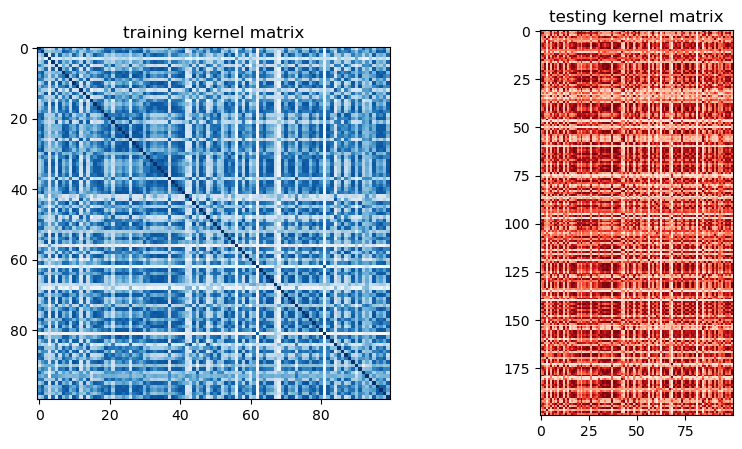

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.asmatrix(matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("training kernel matrix")
axs[1].imshow(np.asmatrix(matrix_test),
              interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("testing kernel matrix")
plt.show()

In [29]:
start = time.time()

zzcb_svc = SVC(kernel=zz_kernel.evaluate)
zzcb_svc.fit(X_train, y_train)
zzcb_score = zzcb_svc.score(X_test, y_test)

elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")

print(f'Callable kernel classification test score: {zzcb_score}')

Training time: 978 seconds
Callable kernel classification test score: 0.91


In [30]:
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
start = time.time()

for kernel in classical_kernels:
    classical_svc = SVC(kernel=kernel)
    classical_svc.fit(X_train, y_train)
    classical_score = classical_svc.score(X_test, y_test)

    print('%s kernel classification test score:  %0.2f' % (kernel, classical_score))
    
elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")

linear kernel classification test score:  0.91
poly kernel classification test score:  0.91
rbf kernel classification test score:  0.91
sigmoid kernel classification test score:  0.91
Training time: 0 seconds
